         Date       Open       High        Low      Close  Adj Close  \
0  2016-05-13  22.500000  22.917500  22.500000  22.629999  21.140608   
1  2016-05-16  23.097500  23.597500  22.912500  23.469999  21.925322   
2  2016-05-17  23.637501  23.674999  23.252501  23.372499  21.834238   
3  2016-05-18  23.540001  23.802500  23.472500  23.639999  22.084131   
4  2016-05-19  23.660000  23.660000  23.392500  23.549999  22.000053   

      Volume  
0  177571200  
1  245039200  
2  187667600  
3  168249600  
4  121768400  
trainging days = (1258, 7)


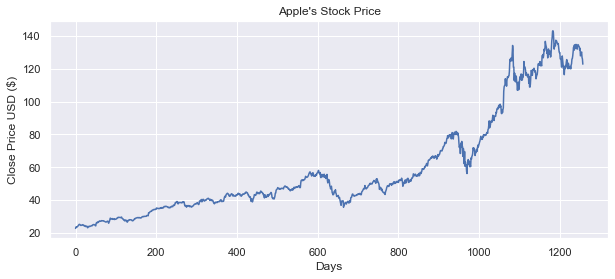

Open         0.999429
High         0.999701
Low          0.999706
Close        1.000000
Adj Close    0.999959
Volume       0.009638
Name: Close, dtype: float64


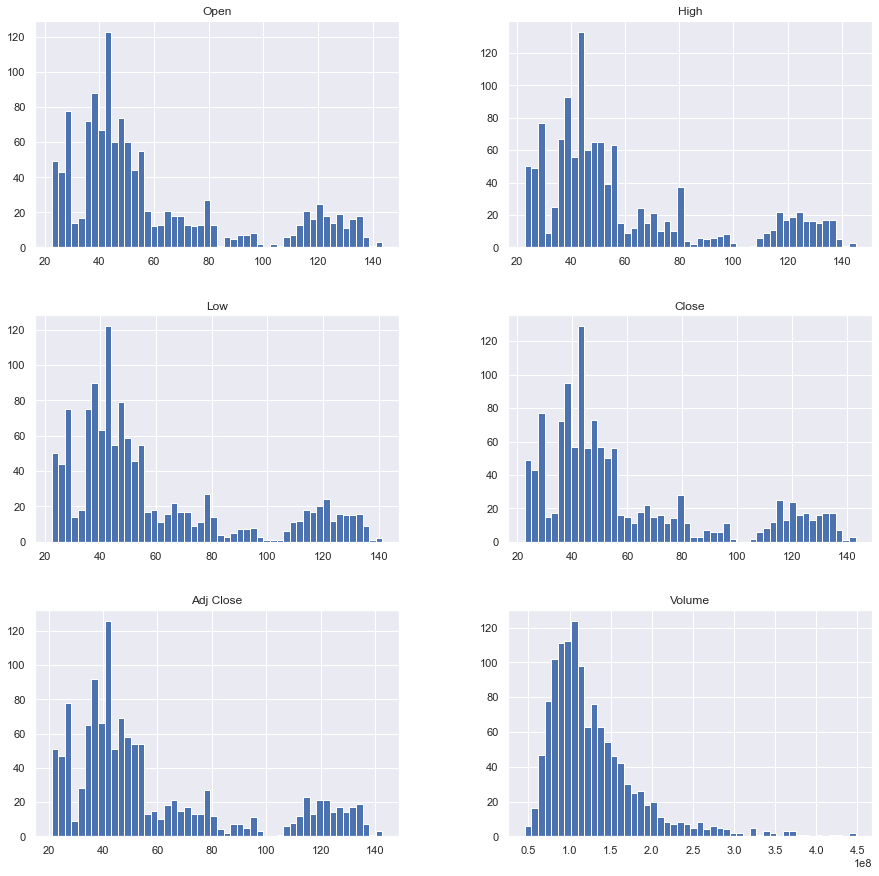

In [28]:
import pandas as pd
import numpy as np

df = pd.read_csv("AAPL.csv")

print(df.head())
print("trainging days =",df.shape)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(figsize=(10, 4))
plt.title("Apple's Stock Price")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(df["Close"])
plt.show()

#display histogram for six features
df.hist(bins=50,figsize=(15,15))


corr_matrix=df.corr()

print(corr_matrix['Close'])

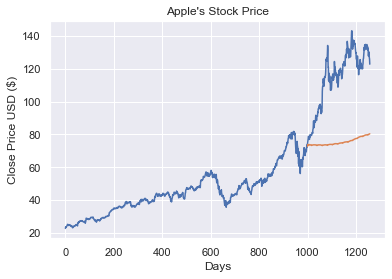

In [36]:
from sklearn.linear_model import LinearRegression
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

#Create moving averages based on past closing prices and predicts price for day
past_closes = data['Close'][len(x_train)-8:len(x_train)].to_list()
for i in range(len(x_test)):
    seven_avg = 0
    five_avg = 0
    for j in range(0, 7):
        seven_avg += past_closes[len(past_closes)-1-j]
    x_test.at[i+1000, '7DAYS'] = seven_avg/7
    for j in range(0, 5):
        five_avg += past_closes[len(past_closes)-1-j]
    x_test.at[i+1000, '5DAYS'] = five_avg/5
    test = x_test.iloc[[i]]
    #Predict price and add it to the list of past closing prices
    past_closes.append(linear_model.predict(x_test.iloc[[i]]))

#Plot Stock prices with predicted prices on top
plt.plot(df['Close'])
x_test['Predictions'] = past_closes[8:]
plt.plot(x_test['Predictions'])

plt.title("Apple's Stock Price")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.show()
#Drop the predictions for other models
x_test.drop(['Predictions'], axis = 1, inplace = True)

In [33]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, past_closes[8:]))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, past_closes[8:])))
print('R2 Score:', metrics.r2_score(y_test, past_closes[8:]))

Mean Absolute Error: 39.37526919338204
Root Mean Squared Error: 42.57405311348413
R2 Score: -4.927800098517263


In [9]:
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
# KNN
rmse = []
#find best rmse
for i in range(1, 30):
    knn_model = KNeighborsRegressor(n_neighbors = i)
    knn_model.fit(x_train, y_train)
    knn_preds = knn_model.predict(x_train)
    rmse.append(np.sqrt(np.mean(np.power((np.array(y_train)-np.array(knn_preds)),2))))
print(rmse)

[0.0, 0.4788750160827768, 0.5962097578653227, 0.6901112684134126, 0.7411635711788741, 0.8407740377454773, 0.9403983169978342, 1.0334412653030403, 1.121563491929322, 1.1921768732981832, 1.2530772234551937, 1.3037680532868912, 1.3543864963222563, 1.3991830486957684, 1.4394305942689252, 1.4685724845500812, 1.4956547605140773, 1.5207893245028434, 1.5312354249642592, 1.550965347050028, 1.564512099049379, 1.5848130482602947, 1.609179263990659, 1.6213662905192547, 1.6480990264190103, 1.660035432932683, 1.6697482369620484, 1.6858784846369383, 1.6966846076256108]


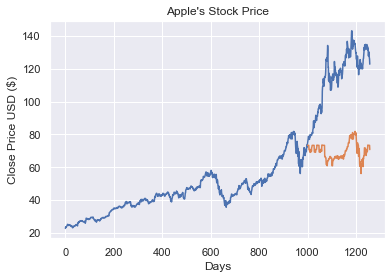

In [37]:
from sklearn.neighbors import KNeighborsRegressor
#k = 1 where rmse was found to be: 0.097
knn_model = KNeighborsRegressor(n_neighbors = 1)
knn_model.fit(x_train, y_train)

#Create moving averages based on past closing prices
past_closes = data['Close'][len(x_train)-8:len(x_train)].to_list()
for i in range(len(x_test)):
    seven_avg = 0
    five_avg = 0
    for j in range(0, 7):
        seven_avg += past_closes[len(past_closes)-1-j]
    x_test.at[i+1000, '7DAYS'] = seven_avg/7
    for j in range(0, 5):
        five_avg += past_closes[len(past_closes)-1-j]
    x_test.at[i+1000, '5DAYS'] = five_avg/5
    test = x_test.iloc[[i]]
    #Predict price and add it to the list of past closing prices
    past_closes.append(knn_model.predict(x_test.iloc[[i]]))

#Plot Stock prices with predicted prices on top
plt.plot(df['Close'])
x_test['Predictions'] = past_closes[8:]
plt.plot(x_test['Predictions'])
plt.title("Apple's Stock Price")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.show()
#Drop the predictions for other models
x_test.drop(['Predictions'], axis = 1, inplace = True)

In [11]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, past_closes[8:]))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, past_closes[8:])))
print('R2 Score:', metrics.r2_score(y_test, past_closes[8:]))

Mean Absolute Error: 44.99924381007752
Root Mean Squared Error: 48.439771126687674
R2 Score: -6.673751288746587


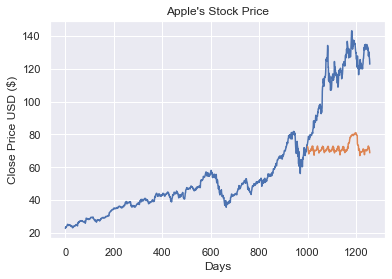

In [38]:
from sklearn.ensemble import RandomForestRegressor
#Random Forest
# Instantiate model with 100 decision trees
rf = RandomForestRegressor(n_estimators = 100)
# Train the model on training data
rf.fit(x_train, y_train);

#Create moving averages based on past closing prices
past_closes = data['Close'][len(x_train)-8:len(x_train)].to_list()
for i in range(len(x_test)):
    seven_avg = 0
    five_avg = 0
    for j in range(0, 7):
        seven_avg += past_closes[len(past_closes)-1-j]
    x_test.at[i+1000, '7DAYS'] = seven_avg/7
    for j in range(0, 5):
        five_avg += past_closes[len(past_closes)-1-j]
    x_test.at[i+1000, '5DAYS'] = five_avg/5
    test = x_test.iloc[[i]]
    #Predict price and add it to the list of past closing prices
    past_closes.append(rf.predict(x_test.iloc[[i]]))

#Plot Stock prices with predicted prices on top
plt.plot(df['Close'])
x_test['Predictions'] = past_closes[8:]
plt.plot(x_test['Predictions'])
plt.title("Apple's Stock Price")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.show()
#Drop the predictions for other models
x_test.drop(['Predictions'], axis = 1, inplace = True)


In [13]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, past_closes[8:]))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, past_closes[8:])))
print('R2 Score:', metrics.r2_score(y_test, past_closes[8:]))


Mean Absolute Error: 42.991766145736435
Root Mean Squared Error: 46.0692378065627
R2 Score: -5.941056964263652
